In [7]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math

In [8]:
# function
def selection(a,b,c):
    h_prime=[a,b,c]
    key=max(h_prime)
    ans=h_prime.index(key)
    if b==c and b>c:
        return 1
    elif b==a and b>c:
        return 1
    elif a==b and a==c:
        return 1
    else:
        return ans

In [9]:
# kenar neshast  creation
start=timeit.default_timer()
horizontal_length=200
particle_number=20000
h=list(np.zeros(horizontal_length))
x_new=[]
y_new=[]
for j in range(particle_number):
    x=np.random.randint(horizontal_length)
    if x==0:
        ans=selection(h[horizontal_length-1],h[0],h[1])
        if ans==0:
            h[x]=h[horizontal_length-1]
            x_new.append(x)
            y_new.append(h[horizontal_length-1])
        elif ans==1:
            h[x]=h[x]+1
            x_new.append(x)
            y_new.append(h[x])
        else:
            h[x]=h[x+1]
            x_new.append(x)
            y_new.append(h[x+1])
    elif x==horizontal_length-1:
        ans=selection(h[horizontal_length-2],h[horizontal_length-1],h[0])
        if ans==0:
            h[x]=h[x-1]
            x_new.append(x)
            y_new.append(h[x-1])
        elif ans==1:
            h[x]=h[x]+1
            x_new.append(x)
            y_new.append(h[x])
        else:
            h[x]=h[0]
            x_new.append(x)
            y_new.append(h[0])
    else:
        ans=selection(h[x-1],h[x],h[x+1])
        if ans==0:
            h[x]=h[x-1]
            x_new.append(x)
            y_new.append(h[x-1])
        elif ans==1:
            h[x]=h[x]+1
            x_new.append(x)
            y_new.append(h[x])
        else:
            h[x]=h[x+1]
            x_new.append(x)
            y_new.append(h[x+1])
stop=timeit.default_timer()
print('creation time :',stop-start)

creation time : 0.08049729999765987


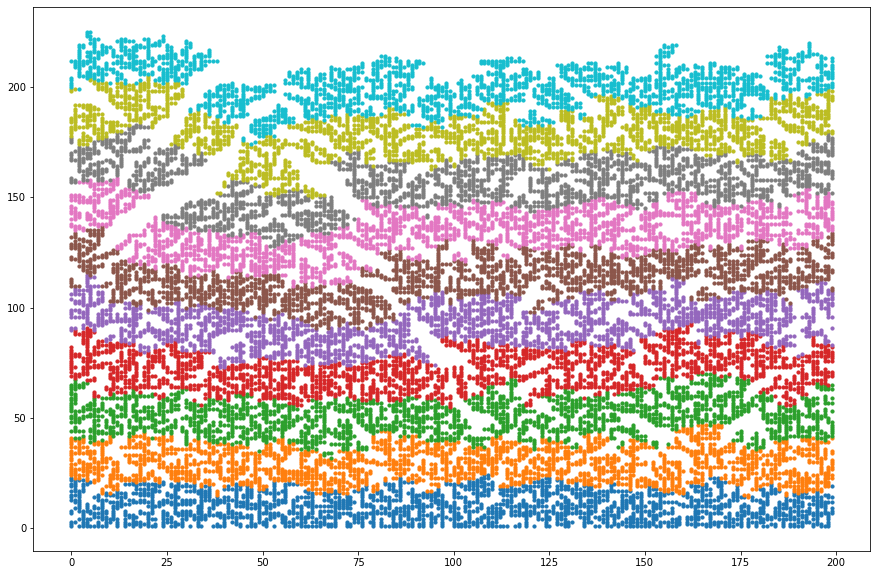

In [10]:
# kenar neshast show
fig = plt.figure(figsize=(15,10))
colour=10  #number of colours
n=int(particle_number/colour)
for i in range(colour):
    plt.scatter(x_new[i*n:(i+1)*n],y_new[i*n:(i+1)*n],s=10)

In [12]:
# variance calculating for 5 runs and 4 million particles
start=timeit.default_timer()
particle_number=4000000
horizontal_length=200
run=5
h=np.zeros(((run,horizontal_length)))
x_new=[]
y_new=[]
variance=[]
tt=[]
h_prime=[]
factor=10**(1/4)
for i in range(run):
    var_count=100
    for j in range(particle_number):
        x=np.random.randint(horizontal_length)
        if x==0:
            ans=selection(h[i][horizontal_length-1],h[i][0],h[i][1])
            if ans==0:
                h[i][x]=h[i][horizontal_length-1]
                x_new.append(x)
                y_new.append(h[i][horizontal_length-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        elif x==horizontal_length-1:
            ans=selection(h[i][horizontal_length-2],h[i][horizontal_length-1],h[i][0])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][0]
                x_new.append(x)
                y_new.append(h[i][0])
        else:
            ans=selection(h[i][x-1],h[i][x],h[i][x+1])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        if j==var_count:
            if i==0:
                tt.append(var_count)
                print(len(tt))
            variance.append(np.sqrt(np.var(h[i][0:horizontal_length])))
            h_prime.append(np.mean(h[i][0:horizontal_length]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start)                       

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
variance calculation time : 121.14489329999924


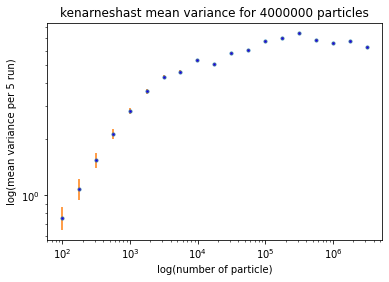

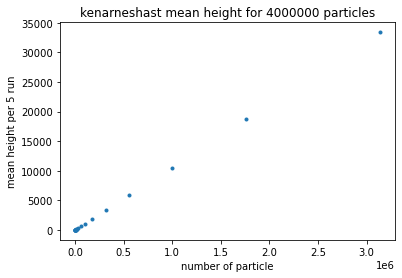

In [13]:
#mean variance and mean height ploting
variance_prime=np.zeros(len(tt))
variance_prime2=np.zeros(len(tt))
w=np.zeros(len(tt))
yerr =[]
h_mean=np.zeros(len(tt))
for j in range(len(tt)):
    for i in range(run):
        variance_prime[j]=variance[int(len(tt)*i+j)]+variance_prime[j]
        variance_prime2[j]=variance[int(len(tt)*i+j)]**2+variance_prime[j]**2
        h_mean[j]=h_prime[int(len(tt)*i+j)]+h_mean[j]
        
variance_prime=variance_prime/run
variance_prime2=variance_prime2/run
w=variance_prime**2
h_mean=h_mean/run
for k in range(len(tt)):
    yerr.append(np.sqrt(variance_prime2[k]-w[k]))    
    yerr[k]=math.log(yerr[k],10)/(variance_prime[k]*math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('kenarneshast mean variance for 4000000 particles')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt,variance_prime,'.')

#plt.plot(np.log(tt),np.log(variance_prime),'.')
ax.errorbar(tt,variance_prime,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)
ax.set_yscale('log')
plt.yscale('log')
fig,ax=plt.subplots()
ax.set_title('kenarneshast mean height for 4000000 particles')
ax.set_ylabel('mean height per 5 run')
ax.set_xlabel('number of particle')
plt.plot(tt,h_mean,'.')

In [28]:
#fit line
x=np.log(tt)
y=np.log(variance_prime)
point_s=len(tt)
for i in range(len(tt)):
    z=np.polyfit(x[i:len(tt)],y[i:len(tt)],1)
    if -0.01<z[0]<0.01:
        point_s=i
        break
t_x=tt[point_s+3]
w_x=variance_prime[point_s+3]

In [29]:
print('saturation point is',t_x)

saturation point is 313514


In [30]:
print('saturation variance',w_x)

saturation variance 7.445308873687312


In [484]:
tt

[100,
 177,
 314,
 558,
 992,
 1764,
 3136,
 5576,
 9915,
 17631,
 31352,
 55752,
 99142,
 176302,
 313514,
 557515,
 991417,
 1763016,
 3135135]

In [14]:
variance_prime

array([0.75714403, 1.08030517, 1.54579228, 2.1428971 , 2.84356507,
       3.61705984, 4.31333791, 4.62849313, 5.32083294, 5.0636402 ,
       5.83155398, 6.0721871 , 6.72553892, 7.05261254, 7.44530887,
       6.84247392, 6.60132068, 6.7720409 , 6.25741563])

In [31]:
h_mean

array([5.3300000e-01, 1.0080000e+00, 1.9920000e+00, 4.0210000e+00,
       8.0760000e+00, 1.6018000e+01, 3.0243000e+01, 5.5528000e+01,
       1.0110900e+02, 1.8325100e+02, 3.2839300e+02, 5.8559800e+02,
       1.0462060e+03, 1.8632160e+03, 3.3244750e+03, 5.9382980e+03,
       1.0548523e+04, 1.8791108e+04, 3.3408008e+04])

Beta is 0.2594084145148693


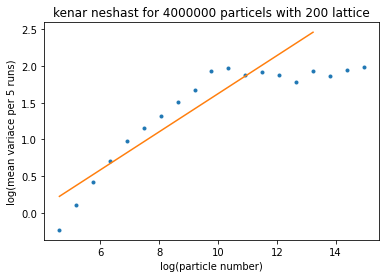

In [525]:
# beta calculating and show
z=np.polyfit(x[0:point_s+6],y[0:point_s+6],1)
print('Beta is',z[0])
fig,ax=plt.subplots()
ax.set_title('kenar neshast for 4000000 particels with 200 lattice')
ax.set_ylabel('log(mean variace per 5 runs)')
ax.set_xlabel('log(particle number)')
plt.plot(x,y,'.')
plt.plot([x[0],x[point_s+6]],[x[0]*z[0]+z[1],x[point_s+6]*z[0]+z[1]])

In [339]:
start=timeit.default_timer()
horizontal_length=100
particle_number=8000000
run=5
h=np.zeros(((run,horizontal_length)))
x_new=[]
y_new=[]
variance1=[]
tt1=[]
h_prime=[]
factor=10**(1/6)
for i in range(run):
    var_count=100
    for j in range(particle_number):
        x=np.random.randint(horizontal_length)
        if x==0:
            ans=selection(h[i][horizontal_length-1],h[i][0],h[i][1])
            if ans==0:
                h[i][x]=h[i][horizontal_length-1]
                x_new.append(x)
                y_new.append(h[i][horizontal_length-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        elif x==horizontal_length-1:
            ans=selection(h[i][horizontal_length-2],h[i][horizontal_length-1],h[i][0])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][0]
                x_new.append(x)
                y_new.append(h[i][0])
        else:
            ans=selection(h[i][x-1],h[i][x],h[i][x+1])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        if j==var_count:
            if i==0:
                tt1.append(var_count)
                print(len(tt1))
            variance1.append(np.sqrt(np.var(h[i][0:horizontal_length])))
            h_prime.append(np.mean(h[i][0:horizontal_length]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start)  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
variance calculation time : 234.8374111000012


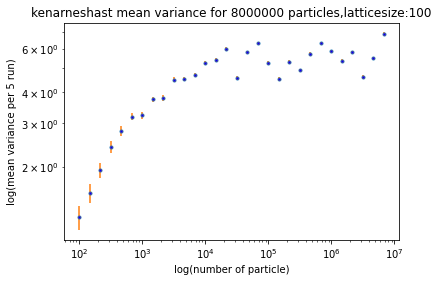

In [340]:
#mean variance for lattice size 100
variance_prime1=np.zeros(len(tt1))
variance_prime21=np.zeros(len(tt1))
w=np.zeros(len(tt1))
yerr =[]
h_mean=np.zeros(len(tt1))
for j in range(len(tt1)):
    for i in range(run):
        variance_prime1[j]=variance1[int(len(tt1)*i+j)]+variance_prime1[j]
        variance_prime21[j]=variance1[int(len(tt1)*i+j)]**2+variance_prime1[j]**2
        
variance_prime1=variance_prime1/run
variance_prime21=variance_prime21/run
w=variance_prime1**2
for k in range(len(tt1)):
    yerr.append(np.sqrt(variance_prime21[k]-w[k]))    
    yerr[k]=math.log(yerr[k],10)/(variance_prime1[k]*math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('kenarneshast mean variance for 8000000 particles,latticesize:100')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt1,variance_prime1,'.')

ax.errorbar(tt1,variance_prime1,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)
ax.set_yscale('log')
plt.yscale('log')

In [372]:
#fit line
x1=np.log(tt1)
y1=np.log(variance_prime1)
point_s1=len(tt1)-1
for i in range(len(tt1)):
    z1=np.polyfit(x1[i:len(tt1)],y1[i:len(tt1)],1)
    if -0.01<z1[0]<0.01:
        point_s1=i
        break
t_x1=tt1[point_s1-8]
w_x1=variance_prime1[point_s1-8]

In [373]:
print('saturation point is',t_x1)

saturation point is 21310


In [374]:
print('saturation variance',w_x1)

saturation variance 6.00522831629107


In [344]:
tt1

[100,
 146,
 214,
 314,
 460,
 675,
 990,
 1453,
 2132,
 3129,
 4592,
 6740,
 9892,
 14519,
 21310,
 31278,
 45909,
 67385,
 98907,
 145175,
 213087,
 312768,
 459080,
 673837,
 989057,
 1451737,
 2130858,
 3127671,
 4590793,
 6738362]

In [375]:
start=timeit.default_timer()
horizontal_length=200
particle_number=8000000
run=5
h=np.zeros(((run,horizontal_length)))
x_new=[]
y_new=[]
variance2=[]
tt2=[]
h_prime=[]
factor=10**(1/6)
for i in range(run):
    var_count=100
    for j in range(particle_number):
        x=np.random.randint(horizontal_length)
        if x==0:
            ans=selection(h[i][horizontal_length-1],h[i][0],h[i][1])
            if ans==0:
                h[i][x]=h[i][horizontal_length-1]
                x_new.append(x)
                y_new.append(h[i][horizontal_length-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        elif x==horizontal_length-1:
            ans=selection(h[i][horizontal_length-2],h[i][horizontal_length-1],h[i][0])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][0]
                x_new.append(x)
                y_new.append(h[i][0])
        else:
            ans=selection(h[i][x-1],h[i][x],h[i][x+1])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        if j==var_count:
            if i==0:
                tt2.append(var_count)
                print(len(tt2))
            variance2.append(np.sqrt(np.var(h[i][0:horizontal_length])))
            h_prime.append(np.mean(h[i][0:horizontal_length]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start)  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
variance calculation time : 237.01674869999988


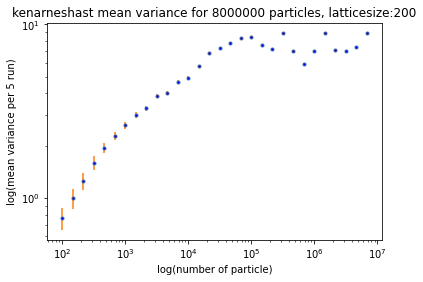

In [376]:
#mean variance for lattice size 200
variance_prime2=np.zeros(len(tt2))
variance_prime22=np.zeros(len(tt2))
w=np.zeros(len(tt2))
yerr =[]
h_mean=np.zeros(len(tt2))
for j in range(len(tt2)):
    for i in range(run):
        variance_prime2[j]=variance2[int(len(tt2)*i+j)]+variance_prime2[j]
        variance_prime22[j]=variance2[int(len(tt2)*i+j)]**2+variance_prime2[j]**2
        
variance_prime2=variance_prime2/run
variance_prime22=variance_prime22/run
w=variance_prime2**2
for k in range(len(tt2)):
    yerr.append(np.sqrt(variance_prime22[k]-w[k]))    
    yerr[k]=math.log(yerr[k],10)/(variance_prime2[k]*math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('kenarneshast mean variance for 8000000 particles, latticesize:200')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt2,variance_prime2,'.')

ax.errorbar(tt2,variance_prime2,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)
ax.set_yscale('log')
plt.yscale('log')

In [377]:
tt2

[100,
 146,
 214,
 314,
 460,
 675,
 990,
 1453,
 2132,
 3129,
 4592,
 6740,
 9892,
 14519,
 21310,
 31278,
 45909,
 67385,
 98907,
 145175,
 213087,
 312768,
 459080,
 673837,
 989057,
 1451737,
 2130858,
 3127671,
 4590793,
 6738362]

In [380]:
#fit line
x2=np.log(tt2)
y2=np.log(variance_prime2)
point_s2=len(tt2)-1
for i in range(len(tt2)):
    z2=np.polyfit(x2[i:len(tt2)],y2[i:len(tt2)],1)
    if -0.002<z2[0]<0.002:
        point_s2=i
        break
t_x2=tt1[point_s2]
w_x2=variance_prime1[point_s2]

In [381]:
print('saturation point is',t_x2)

saturation point is 98907


In [383]:
print('saturation variance',w_x2)

saturation variance 5.237231639413503


In [384]:
start=timeit.default_timer()
horizontal_length=300
particle_number=8000000
run=5
h=np.zeros(((run,horizontal_length)))
x_new=[]
y_new=[]
variance3=[]
tt3=[]
h_prime=[]
factor=10**(1/6)
for i in range(run):
    var_count=100
    for j in range(particle_number):
        x=np.random.randint(horizontal_length)
        if x==0:
            ans=selection(h[i][horizontal_length-1],h[i][0],h[i][1])
            if ans==0:
                h[i][x]=h[i][horizontal_length-1]
                x_new.append(x)
                y_new.append(h[i][horizontal_length-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        elif x==horizontal_length-1:
            ans=selection(h[i][horizontal_length-2],h[i][horizontal_length-1],h[i][0])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][0]
                x_new.append(x)
                y_new.append(h[i][0])
        else:
            ans=selection(h[i][x-1],h[i][x],h[i][x+1])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        if j==var_count:
            if i==0:
                tt3.append(var_count)
                print(len(tt3))
            variance3.append(np.sqrt(np.var(h[i][0:horizontal_length])))
            h_prime.append(np.mean(h[i][0:horizontal_length]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start)  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
variance calculation time : 238.91528059999837


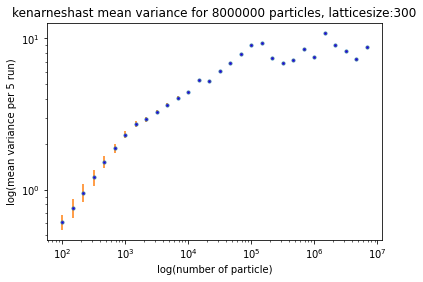

In [385]:
#mean variance for lattice size 300
variance_prime3=np.zeros(len(tt3))
variance_prime23=np.zeros(len(tt3))
w=np.zeros(len(tt3))
yerr =[]
h_mean=np.zeros(len(tt3))
for j in range(len(tt3)):
    for i in range(run):
        variance_prime3[j]=variance3[int(len(tt3)*i+j)]+variance_prime3[j]
        variance_prime23[j]=variance3[int(len(tt3)*i+j)]**2+variance_prime3[j]**2
        
variance_prime3=variance_prime3/run
variance_prime23=variance_prime23/run
w=variance_prime3**2
for k in range(len(tt3)):
    yerr.append(np.sqrt(variance_prime23[k]-w[k]))    
    yerr[k]=math.log(yerr[k],10)/(variance_prime3[k]*math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('kenarneshast mean variance for 8000000 particles, latticesize:300')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt3,variance_prime3,'.')

ax.errorbar(tt3,variance_prime3,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)
ax.set_yscale('log')
plt.yscale('log')

In [390]:
#fit line
x3=np.log(tt3)
y3=np.log(variance_prime3)
point_s3=len(tt3)-1
for i in range(len(tt3)):
    z3=np.polyfit(x3[i:len(tt3)],y3[i:len(tt3)],1)
    if -0.01<z3[0]<0.01:
        point_s3=i
        break
t_x3=tt3[point_s3+2]
w_x3=variance_prime3[point_s3+2]

In [391]:
print('saturation point is',t_x3)

saturation point is 145175


In [392]:
print('saturation variance',w_x3)

saturation variance 9.3413263001358


In [389]:
tt3


[100,
 146,
 214,
 314,
 460,
 675,
 990,
 1453,
 2132,
 3129,
 4592,
 6740,
 9892,
 14519,
 21310,
 31278,
 45909,
 67385,
 98907,
 145175,
 213087,
 312768,
 459080,
 673837,
 989057,
 1451737,
 2130858,
 3127671,
 4590793,
 6738362]

In [393]:
start=timeit.default_timer()
horizontal_length=400
particle_number=8000000
run=5
h=np.zeros(((run,horizontal_length)))
x_new=[]
y_new=[]
variance4=[]
tt4=[]
h_prime=[]
factor=10**(1/6)
for i in range(run):
    var_count=100
    for j in range(particle_number):
        x=np.random.randint(horizontal_length)
        if x==0:
            ans=selection(h[i][horizontal_length-1],h[i][0],h[i][1])
            if ans==0:
                h[i][x]=h[i][horizontal_length-1]
                x_new.append(x)
                y_new.append(h[i][horizontal_length-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        elif x==horizontal_length-1:
            ans=selection(h[i][horizontal_length-2],h[i][horizontal_length-1],h[i][0])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][0]
                x_new.append(x)
                y_new.append(h[i][0])
        else:
            ans=selection(h[i][x-1],h[i][x],h[i][x+1])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        if j==var_count:
            if i==0:
                tt4.append(var_count)
                print(len(tt4))
            variance4.append(np.sqrt(np.var(h[i][0:horizontal_length])))
            h_prime.append(np.mean(h[i][0:horizontal_length]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start)  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
variance calculation time : 236.77137430000585


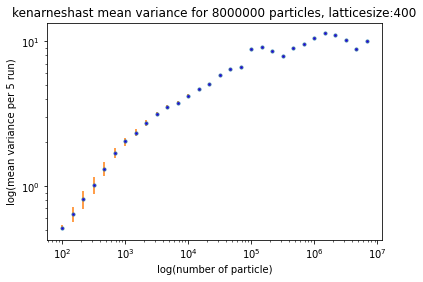

In [447]:
#mean variance for lattice size 400
variance_prime4=np.zeros(len(tt4))
variance_prime24=np.zeros(len(tt4))
w=np.zeros(len(tt4))
yerr =[]
h_mean=np.zeros(len(tt4))
for j in range(len(tt4)):
    for i in range(run):
        variance_prime4[j]=variance4[int(len(tt4)*i+j)]+variance_prime4[j]
        variance_prime24[j]=variance4[int(len(tt4)*i+j)]**2+variance_prime4[j]**2
        
variance_prime4=variance_prime4/run
variance_prime24=variance_prime24/run
w=variance_prime4**2
for k in range(len(tt4)):
    yerr.append(np.sqrt(variance_prime24[k]-w[k]))    
    yerr[k]=math.log(yerr[k],10)/(variance_prime4[k]*math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('kenarneshast mean variance for 8000000 particles, latticesize:400')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt4,variance_prime4,'.')

ax.errorbar(tt4,variance_prime4,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)
ax.set_yscale('log')
plt.yscale('log')

In [448]:
#fit line
x4=np.log(tt4)
y4=np.log(variance_prime4)
point_s4=len(tt4)-1
for i in range(len(tt4)):
    z4=np.polyfit(x4[i:len(tt4)],y4[i:len(tt4)],1)
    if -0.02<z4[0]<0.02:
        point_s4=i
        break
t_x4=tt4[point_s4-2]
w_x4=variance_prime4[point_s4-2]

In [449]:
print('saturation point is',t_x4)

saturation point is 213087


In [450]:
print('saturation variance',w_x4)

saturation variance 8.562951174121137


In [451]:
start=timeit.default_timer()
horizontal_length=500
particle_number=8000000
run=5
h=np.zeros(((run,horizontal_length)))
x_new=[]
y_new=[]
variance5=[]
tt5=[]
h_prime=[]
factor=10**(1/6)
for i in range(run):
    var_count=100
    for j in range(particle_number):
        x=np.random.randint(horizontal_length)
        if x==0:
            ans=selection(h[i][horizontal_length-1],h[i][0],h[i][1])
            if ans==0:
                h[i][x]=h[i][horizontal_length-1]
                x_new.append(x)
                y_new.append(h[i][horizontal_length-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        elif x==horizontal_length-1:
            ans=selection(h[i][horizontal_length-2],h[i][horizontal_length-1],h[i][0])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][0]
                x_new.append(x)
                y_new.append(h[i][0])
        else:
            ans=selection(h[i][x-1],h[i][x],h[i][x+1])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        if j==var_count:
            if i==0:
                tt5.append(var_count)
                print(len(tt5))
            variance5.append(np.sqrt(np.var(h[i][0:horizontal_length])))
            h_prime.append(np.mean(h[i][0:horizontal_length]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start)  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


KeyboardInterrupt: 

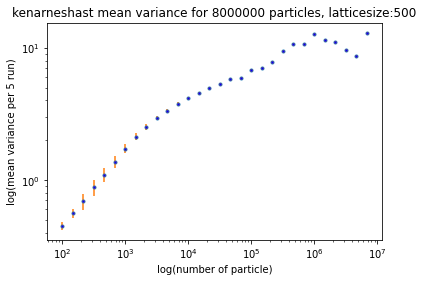

In [446]:
#mean variance for lattice size 500
variance_prime5=np.zeros(len(tt5))
variance_prime25=np.zeros(len(tt5))
w=np.zeros(len(tt5))
yerr =[]
h_mean=np.zeros(len(tt5))
for j in range(len(tt5)):
    for i in range(run):
        variance_prime5[j]=variance5[int(len(tt5)*i+j)]+variance_prime5[j]
        variance_prime25[j]=variance5[int(len(tt5)*i+j)]**2+variance_prime5[j]**2
        
variance_prime5=variance_prime5/run
variance_prime25=variance_prime25/run
w=variance_prime5**2
for k in range(len(tt5)):
    yerr.append(np.sqrt(variance_prime25[k]-w[k]))    
    yerr[k]=math.log(yerr[k],10)/(variance_prime5[k]*math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('kenarneshast mean variance for 8000000 particles, latticesize:500')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt5,variance_prime5,'.')

ax.errorbar(tt5,variance_prime5,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)
ax.set_yscale('log')
plt.yscale('log')

In [452]:
#fit line
x5=np.log(tt5)
y5=np.log(variance_prime5)
point_s5=len(tt5)-1
for i in range(len(tt5)):
    z5=np.polyfit(x5[i:len(tt5)],y5[i:len(tt5)],1)
    if -0.01<z5[0]<0.01:
        point_s5=i
        break
t_x5=tt5[point_s5-1]
w_x5=variance_prime4[point_s5-1]

In [453]:
print('saturation point is',t_x5)

saturation point is 989057


In [454]:
print('saturation variance',w_x5)

saturation variance 10.466444964068838


In [416]:
start=timeit.default_timer()
horizontal_length=600
particle_number=8000000
run=5
h=np.zeros(((run,horizontal_length)))
x_new=[]
y_new=[]
variance6=[]
tt6=[]
h_prime=[]
factor=10**(1/6)
for i in range(run):
    var_count=100
    for j in range(particle_number):
        x=np.random.randint(horizontal_length)
        if x==0:
            ans=selection(h[i][horizontal_length-1],h[i][0],h[i][1])
            if ans==0:
                h[i][x]=h[i][horizontal_length-1]
                x_new.append(x)
                y_new.append(h[i][horizontal_length-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        elif x==horizontal_length-1:
            ans=selection(h[i][horizontal_length-2],h[i][horizontal_length-1],h[i][0])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][0]
                x_new.append(x)
                y_new.append(h[i][0])
        else:
            ans=selection(h[i][x-1],h[i][x],h[i][x+1])
            if ans==0:
                h[i][x]=h[i][x-1]
                x_new.append(x)
                y_new.append(h[i][x-1])
            elif ans==1:
                h[i][x]=h[i][x]+1
                x_new.append(x)
                y_new.append(h[i][x])
            else:
                h[i][x]=h[i][x+1]
                x_new.append(x)
                y_new.append(h[i][x+1])
        if j==var_count:
            if i==0:
                tt6.append(var_count)
                print(len(tt6))
            variance6.append(np.sqrt(np.var(h[i][0:horizontal_length])))
            h_prime.append(np.mean(h[i][0:horizontal_length]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
variance calculation time : 242.87029260000418


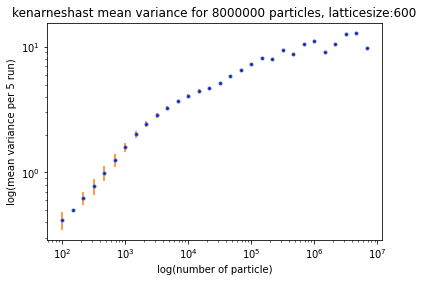

In [418]:
#mean variance for lattice size 600
variance_prime6=np.zeros(len(tt6))
variance_prime26=np.zeros(len(tt6))
w=np.zeros(len(tt6))
yerr =[]
h_mean=np.zeros(len(tt6))
for j in range(len(tt6)):
    for i in range(run):
        variance_prime6[j]=variance6[int(len(tt6)*i+j)]+variance_prime6[j]
        variance_prime26[j]=variance6[int(len(tt6)*i+j)]**2+variance_prime6[j]**2
        
variance_prime6=variance_prime6/run
variance_prime26=variance_prime26/run
w=variance_prime6**2
for k in range(len(tt6)):
    yerr.append(np.sqrt(variance_prime26[k]-w[k]))    
    yerr[k]=math.log(yerr[k],10)/(variance_prime6[k]*math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('kenarneshast mean variance for 8000000 particles, latticesize:600')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt6,variance_prime6,'.')

ax.errorbar(tt6,variance_prime6,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)
ax.set_yscale('log')
plt.yscale('log')

In [455]:
#fit line
x6=np.log(tt6)
y6=np.log(variance_prime6)
point_s6=len(tt6)-1
for i in range(len(tt6)):
    z6=np.polyfit(x6[i:len(tt6)],y6[i:len(tt6)],1)
    if -0.05<z6[0]<0.05:
        point_s6=i
        break
t_x6=tt6[point_s6-1]
w_x6=variance_prime4[point_s6-1]

In [456]:
print('saturation point is',t_x6)

saturation point is 459080


In [457]:
print('saturation variance',w_x6)

saturation variance 9.06071093997147


In [526]:
ws =[w_x1,w_x2,w_x3,w_x4,w_x5,w_x6]
L =[100,200,300,400,500,600]
ts =[t_x1,t_x2,t_x3,t_x3,t_x5,t_x6]

Alpha is 0.3324162028303793


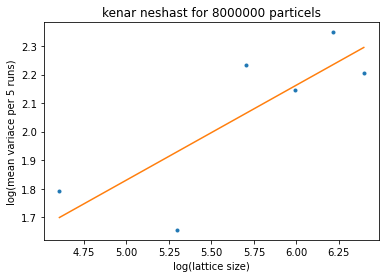

In [464]:
x=np.log(L)
y=np.log(ws)
z=np.polyfit(x,y,1)
print('Alpha is',z[0])
fig,ax=plt.subplots()
ax.set_title('kenar neshast for 8000000 particels')
ax.set_ylabel('log(mean variace per 5 runs)')
ax.set_xlabel('log(lattice size)')
plt.plot(x,y,'.')
a=[x[0],x[len(L)-1]]
b=[x[0]*z[0]+z[1],x[len(L)-1]*z[0]+z[1]]
plt.plot(a,b)

Beta is 0.15838175984244246


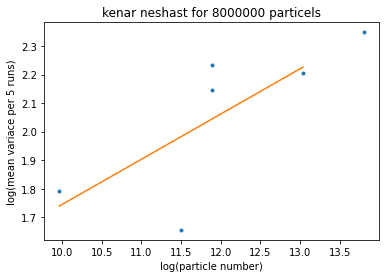

In [527]:
x=np.log(ts)
y=np.log(ws)
z=np.polyfit(x,y,1)
print('Beta is',z[0])
fig,ax=plt.subplots()
ax.set_title('kenar neshast for 8000000 particels')
ax.set_ylabel('log(mean variace per 5 runs)')
ax.set_xlabel('log(particle number)')
plt.plot(x,y,'.')
a=[x[0],x[len(ws)-1]]
b=[x[0]*z[0]+z[1],x[len(ws)-1]*z[0]+z[1]]
plt.plot(a,b)

Z is 0.4627310106471263


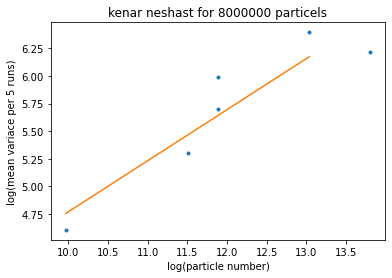

In [528]:
x=np.log(ts)
y=np.log(L)
z=np.polyfit(x,y,1)
print('Z is',z[0])
fig,ax=plt.subplots()
ax.set_title('kenar neshast for 8000000 particels')
ax.set_ylabel('log(mean variace per 5 runs)')
ax.set_xlabel('log(particle number)')
plt.plot(x,y,'.')
a=[x[0],x[len(L)-1]]
b=[x[0]*z[0]+z[1],x[len(L)-1]*z[0]+z[1]]
plt.plot(a,b)